In [254]:
#import pandas, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#change display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [255]:
#read in and preview file
#download path https://www.kaggle.com/toshimelonhead/400000-kickstarter-projects
file_path = 'kickstarter.csv'

data = pd.read_csv(file_path, index_col = 'Unnamed: 0')
print(data.head(1))
data.info()

          id  backers_count  \
0  857125548              1   

                                               blurb currency    goal  \
0  Exploring paint and its place in a digital world.      USD  2000.0   

           launched_at             deadline location.country   name  \
0  2015-03-19 22:34:57  2015-04-30 23:12:00               US  Remix   

   usd_pledged  ... days_to_deadline  goal_USD  category_name  category_slug  \
0         25.0  ...               42    2000.0    Digital Art            art   

  blurb_length  location_type  location_country  location_state  \
0            9           Town                US              NY   

   location_displayable_name  binary_state  
0               New York, NY        failed  

[1 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430938 entries, 0 to 768
Data columns (total 29 columns):
id                           430938 non-null int64
backers_count                430938 non-null int64
blurb                       

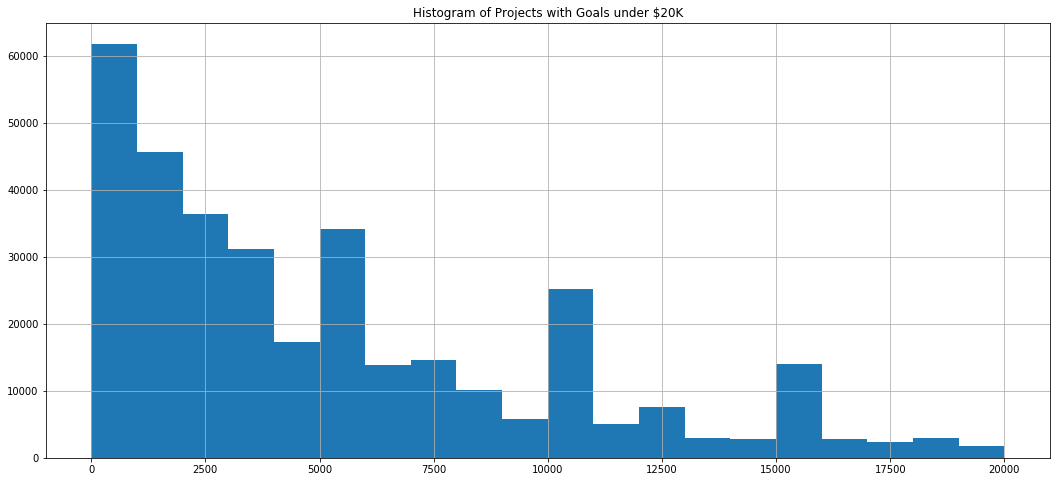

In [256]:
#attempt to understand goal_USD data shape by only looking at data under 20k (too zoomed out without the restriction)
data['goal_USD'].loc[data['goal_USD'] < 20000].hist(bins = 20, figsize=(18,8))
plt.title('Histogram of Projects with Goals under $20K')
plt.show()

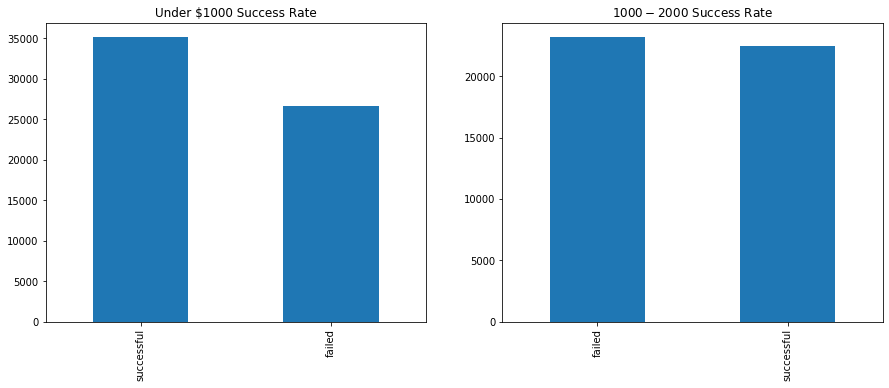

In [257]:
#Checking first 1000 category against 2nd 1000. Already by the second, failure is more likely than success.
fig=plt.figure(figsize=(15,5.5))
plt.subplot(1,2,1)
plt.title('Under $1000 Success Rate')
data['binary_state'].loc[data['goal_USD'] < 1000].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
plt.title("$1000 - $2000 Success Rate")
data['binary_state'][(data['goal_USD'] >= 1000) & (data['goal_USD'] < 2000)].value_counts().plot(kind='bar')
plt.show()


I decided to throw out data with a goal under $1000 as they do not seem to be "serious" crowdfunding projects.

In [258]:
#throwing data with a goal under 1000
cleaned_data = data.loc[data['goal_USD'] >= 1000]

In [259]:
#print out approximate time when data was captured
print(cleaned_data['launched_at'].max())
#filter out data where target date is beyond the date of the data
cleaned_data = cleaned_data.loc[cleaned_data['deadline'] <= cleaned_data['launched_at'].max()]

2019-04-18 04:49:38


I threw out data where the deadline is beyond the cutoff date

In [260]:
#dropping the location.country column (there is already a location_country column); the days to deadline column as it is not useful for analysis as the deadline should be passed;
# the state column is not necessary with the binary state column; and the individual date columns are not necessary
cleaned_data = cleaned_data.drop(columns=['location.country', 'days_to_deadline', 'state', 'year', 'month', 'day', 'hour'])

I threw out some unnecessary columns.

In [261]:
#is ID an appropriate index?
cleaned_data.id.nunique()

267679

ID is not an appropriate index as there are duplicates

In [262]:
#look at some duplicated ID values
cleaned_data[cleaned_data.id.duplicated(keep=False)].sort_values('id').head(7)

,id,backers_count,blurb,currency,goal,launched_at,deadline,name,usd_pledged,slug,...,static_usd_rate,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
3619,8624,737,A compact outdoor cooking set that you can use...,EUR,30000.0,2018-02-22 09:44:29,2018-03-29 08:44:29,Kombuis a portable and efficient rocket stove ...,93005.594341,kombuis-a-portable-and-efficient-rocket-stove-...,...,1.23221,36966.2991,Product Design,design,12,Town,US,WV,"Belgium, WV",successful
865,8624,499,A compact outdoor cooking set that you can use...,EUR,30000.0,2018-02-22 09:44:29,2018-03-29 08:44:29,Kombuis a portable and efficient rocket stove ...,59989.760404,kombuis-a-portable-and-efficient-rocket-stove-...,...,1.23221,36966.2991,Product Design,design,12,Town,US,WV,"Belgium, WV",successful
1446,8624,498,A compact outdoor cooking set that you can use...,EUR,30000.0,2018-02-22 09:44:29,2018-03-29 08:44:29,Kombuis a portable and efficient rocket stove ...,59871.468247,kombuis-a-portable-and-efficient-rocket-stove-...,...,1.23221,36966.2991,Product Design,design,12,Town,US,WV,"Belgium, WV",successful
2753,18520,2,Raising money to help my grandmother recover f...,USD,15000.0,2016-10-19 13:32:40,2016-11-18 14:32:40,Grandma's are Life,11.000000,grandmas-are-life,...,1.00000,15000.0000,World Music,music,24,Town,US,OH,"Cleveland, OH",failed
3348,18520,4,Raising money to help my grandmother recover f...,USD,15000.0,2016-10-19 13:32:40,2016-11-18 14:32:40,Grandma's are Life,62.000000,grandmas-are-life,...,1.00000,15000.0000,World Music,music,24,Town,US,OH,"Cleveland, OH",failed
3511,38736,3,All your herbal tea remedies here. From colds ...,USD,2500.0,2018-08-22 03:51:56,2018-10-21 03:51:56,Herbal Teas,96.000000,herbal-teas,...,1.00000,2500.0000,Drinks,food,21,Town,US,NY,"Livonia, NY",failed
3006,38736,3,All your herbal tea remedies here. From colds ...,USD,2500.0,2018-08-22 03:51:56,2018-10-21 03:51:56,Herbal Teas,96.000000,herbal-teas,...,1.00000,2500.0000,Drinks,food,21,Town,US,NY,"Livonia, NY",failed


The same projects are captured at different points in time, I will remove duplicate ID lines taking information from the most recent information (highest USD pledged)

In [263]:
#dropping duplicates, note sorting by usd pledged so I only keep the most recent data
cleaned_data = cleaned_data.sort_values('usd_pledged', ascending = False).drop_duplicates(subset = 'id', keep = 'first')
cleaned_data.id.nunique()

267679

ID is now a unique column, so it can be set as the index

In [264]:
#drop old index and replace with ID column
cleaned_data = cleaned_data.reset_index(drop=True).set_index('id').sort_index()

cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267679 entries, 8624 to 2147476221
Data columns (total 21 columns):
backers_count                267679 non-null int64
blurb                        267679 non-null object
currency                     267679 non-null object
goal                         267679 non-null float64
launched_at                  267679 non-null object
deadline                     267679 non-null object
name                         267676 non-null object
usd_pledged                  267679 non-null float64
slug                         267679 non-null object
spotlight                    267679 non-null bool
staff_pick                   267679 non-null bool
static_usd_rate              267679 non-null float64
goal_USD                     267679 non-null float64
category_name                267679 non-null object
category_slug                267679 non-null object
blurb_length                 267679 non-null int64
location_type                267679 non-null object


In [265]:
#create a new column for days between launch and goal date
cleaned_data['launched_at'] = pd.to_datetime(cleaned_data['launched_at'])
cleaned_data['deadline'] = pd.to_datetime(cleaned_data['deadline'])
cleaned_data['days_between'] = (cleaned_data['deadline'] - cleaned_data['launched_at']).dt.days

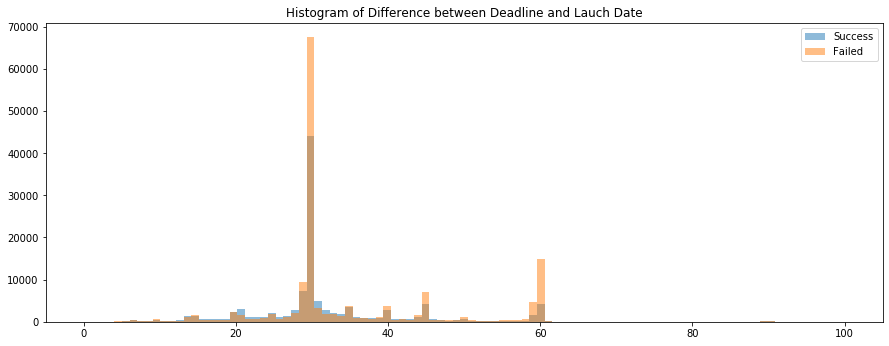

In [266]:
#histogram of days between
fig=plt.figure(figsize=(15,5.5))
x = cleaned_data['days_between'].loc[cleaned_data['binary_state'] == 'successful']
y = cleaned_data['days_between'].loc[cleaned_data['binary_state'] == 'failed']
bins = np.linspace(0, 100, 100)

plt.hist(x, bins, alpha=0.5, label='Success')
plt.hist(y, bins, alpha=0.5, label='Failed')
plt.legend(loc='upper right')
plt.title('Histogram of Difference between Deadline and Lauch Date')
plt.show()

Most Kickstarters have the deadline set at around 30 days from the launch date.

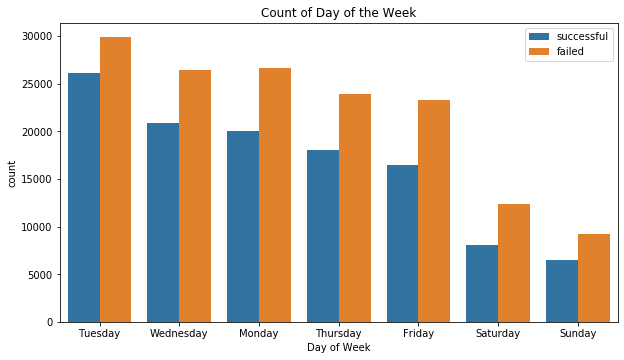

In [267]:
#day of the week bar chart
# https://seaborn.pydata.org/generated/seaborn.countplot.html interesting information
cleaned_data['day_week'] = cleaned_data['launched_at'].dt.day_name()
fig=plt.figure(figsize=(10,5.5))
chart = sns.countplot(x = 'day_week', hue = 'binary_state', data = cleaned_data, order = cleaned_data['day_week'].value_counts().index)
plt.xlabel('Day of Week')
plt.legend(title = '')
plt.title('Count of Day of the Week')
plt.show()

The middle of the week is the most popular launch time.

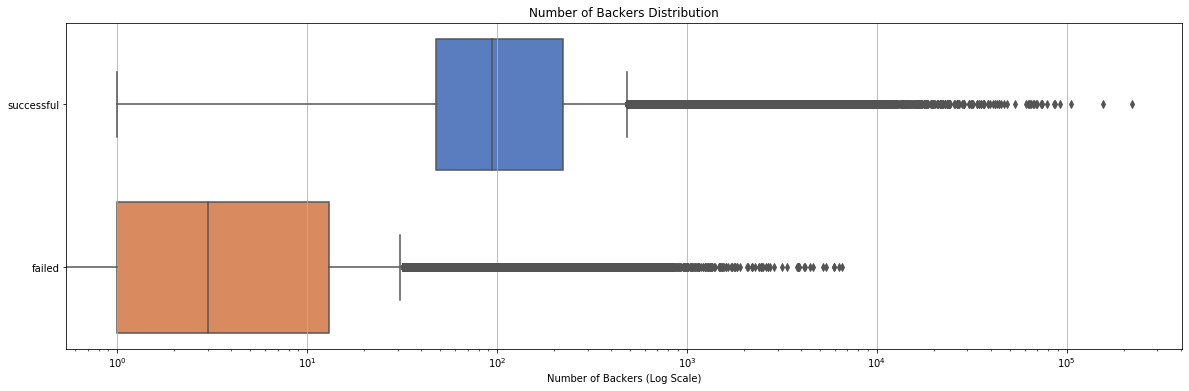

In [268]:
#looking distribution of the backers_count column
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="backers_count", y="binary_state", data=cleaned_data, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "Number of Backers (Log Scale)", title = 'Number of Backers Distribution')
plt.show()

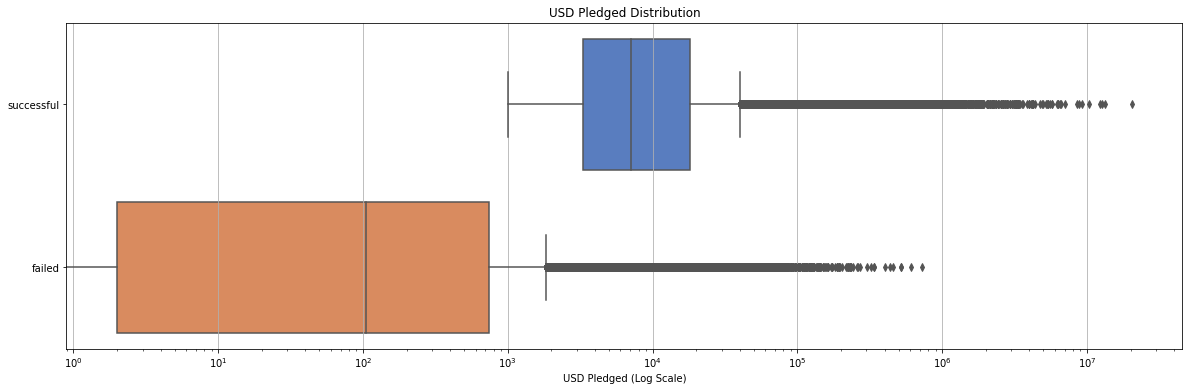

In [269]:
#looking at distribution of USD Pledged
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="usd_pledged", y="binary_state", data=cleaned_data, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "USD Pledged (Log Scale)", title = 'USD Pledged Distribution')
plt.show()

Successful Kickstarter campaigns are outliers in themselves

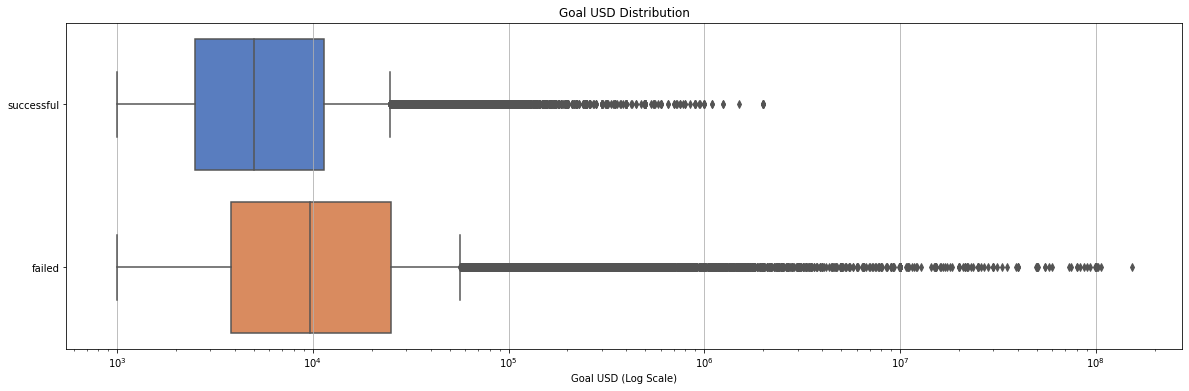

In [270]:
#looking at distribution of USD Goal
f, ax = plt.subplots(figsize=(20, 6))
ax.set_xscale("log")
sns.boxplot(x="goal_USD", y="binary_state", data=cleaned_data, palette = 'muted')
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel = "Goal USD (Log Scale)", title = 'Goal USD Distribution')
plt.show()

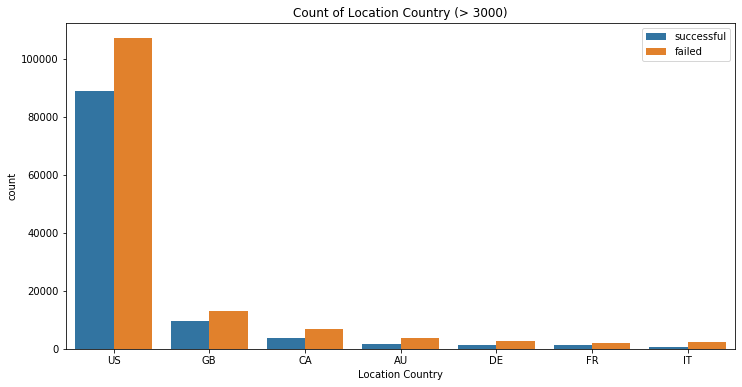

In [275]:
#show the frequency of location country for those with at least 5000 occurrences
fig = plt.figure(figsize = (12, 6))
sns.countplot(x = 'location_country', hue = 'binary_state', 
              data = cleaned_data[cleaned_data.location_country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR', 'IT'])], 
              order = cleaned_data.location_country.loc[cleaned_data.location_country.isin(['US', 'GB', 'CA', 'AU', 'DE', 'FR', 'IT'])].value_counts().index)
plt.legend(title ='')
plt.xlabel('Location Country')
plt.title('Count of Location Country (> 3000)')
plt.show()

There are only seven countries with more than 3000 occurrences. The US dominates with Great Britain and Canada coming in second and third.